In [153]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from functools import partial
n=100
p=3
t=1
a=0.05
h=sc.uniform.rvs(size=n,loc=p, scale=t)
max=np.max(h)
min=np.min(h)
def d(b,c):
    if c>(1/2**n):
        return((2*(1-b)**n-(1-2*b)**n-c)**2)
    else:
        return((2*(1-b)**n-c)**2)
g = partial(d,c=a)
b=minimize_scalar(g,bracket=(0,1))
q=b.x
q

0.036110251346448505

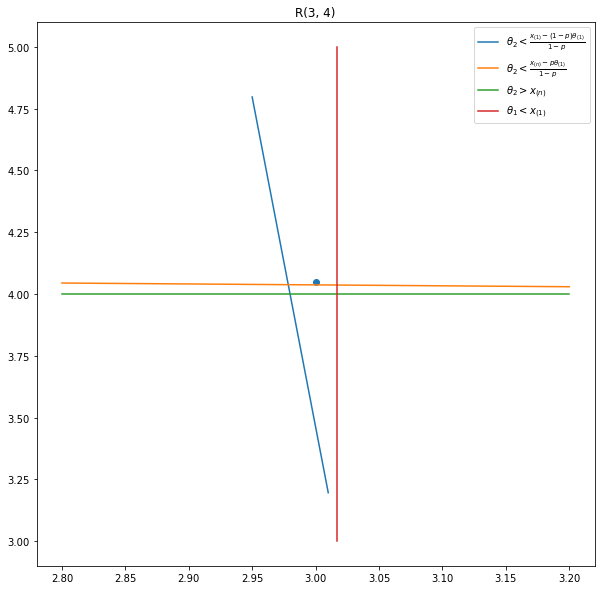

In [155]:
plt.figure(figsize=(10,10))
x = np.linspace(p-0.05,p+0.01 , 1000)
plt.plot(x,(min-(1-q)*x)/q,label = r'$\theta_2<\frac{x_{(1)}-(1-p)\theta_{(1)}}{1-p}$')
x = np.linspace(p-0.2,p+0.2 , 1000)
plt.plot(x,(max-(q)*x)/(1-q),label = r'$\theta_2<\frac{x_{(n)}-p\theta_{(1)}}{1-p}$' )
plt.plot(x,list(map(lambda x: max,x)),label = r'$\theta_2>x_{(n)}$')
x = np.linspace(p, p+t+1, 1000)
plt.plot(list(map(lambda x: min,x)),x,label = r'$\theta_1<x_{(1)}$')
plt.scatter(p,p+t+0.05)
plt.title('R('+str(p)+', '+str(p+t)+')')
plt.legend()
plt.show()